<a href="https://colab.research.google.com/github/aaanthonyyy/3020-project/blob/master/notebooks/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.3.0'

In [ ]:
# Data Parameters
batch_size = 512

# Image Parameters
img_height, img_width = 128, 128

In [ ]:
import pathlib

data_dir = pathlib.Path('dataset/circuit_dataset')

In [ ]:
# Loading training dataset from Drive
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  color_mode='grayscale',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9556 files belonging to 5 classes.
Using 7645 files for training.


In [ ]:
# Loading validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  color_mode='grayscale',
  image_size=(img_height, img_width),
  label_mode="int",
  batch_size=512)


Found 9556 files belonging to 5 classes.
Using 1911 files for validation.


In [ ]:
class_names = train_ds.class_names
print('Number of Classes:',len(class_names))
print(class_names)

Number of Classes: 5
['0_diode', '1_resistor', '2_inductor', '3_capacitor', '5_power']


In [ ]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

regularization = 0.0005

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),

  layers.Conv2D(32, 4, activation='relu', kernel_regularizer="l2"),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 5, activation='relu', kernel_regularizer="l2"),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 5, activation='relu', kernel_regularizer="l2"),
  layers.MaxPooling2D(),

  layers.Conv2D(128, 6, activation='relu', kernel_regularizer="l2"),
  layers.MaxPooling2D(),

  layers.Flatten(),

  layers.Dense(128, activation='relu', kernel_regularizer="l2"),

  layers.Dense(len(class_names), activation='softmax', kernel_regularizer="l2")
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history = model.fit(
            train_ds,
            validation_data=val_ds,
            epochs=100)

Epoch 1/100
15/15 [==============================] - 6s 312ms/step - loss: 5.2150 - accuracy: 0.2150 - val_loss: 3.4076 - val_accuracy: 0.2036
Epoch 2/100
15/15 [==============================] - 4s 244ms/step - loss: 3.0682 - accuracy: 0.2334 - val_loss: 2.4413 - val_accuracy: 0.2255
Epoch 3/100
15/15 [==============================] - 4s 244ms/step - loss: 2.2339 - accuracy: 0.2737 - val_loss: 1.7380 - val_accuracy: 0.4286
Epoch 4/100
15/15 [==============================] - 4s 244ms/step - loss: 1.6854 - accuracy: 0.4803 - val_loss: 1.5214 - val_accuracy: 0.4778
Epoch 5/100
15/15 [==============================] - 4s 244ms/step - loss: 1.4056 - accuracy: 0.5161 - val_loss: 1.2569 - val_accuracy: 0.5406
Epoch 6/100
15/15 [==============================] - 4s 245ms/step - loss: 1.2581 - accuracy: 0.5602 - val_loss: 1.1345 - val_accuracy: 0.5997
Epoch 7/100
15/15 [==============================] - 4s 245ms/step - loss: 1.1299 - accuracy: 0.6067 - val_loss: 1.0637 - val_accuracy: 0.6321

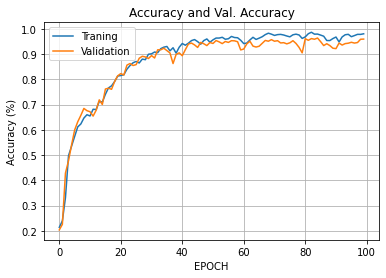

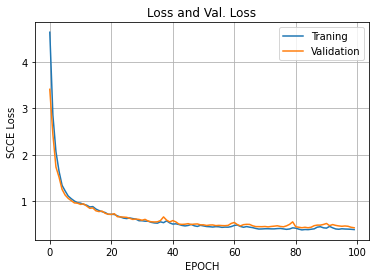

In [ ]:
plt.subplots(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy and Val. Accuracy")
plt.grid(b=True)
plt.legend(["Traning", "Validation"])
plt.ylabel("Accuracy (%)")
plt.xlabel("EPOCH")


plt.subplots(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# plt.yscale('log')
plt.legend(["Traning", "Validation"])
plt.title("Loss and Val. Loss")
plt.ylabel("SCCE Loss")
plt.xlabel("EPOCH")
plt.grid(b=True, which='both')

In [ ]:
model.save('models/9000_1000_epocs_8_layers/')

INFO:tensorflow:Assets written to: /content/drive/My Drive/3020_drive/Models/9000_1000_epocs_8_layers/assets


In [ ]:
#@markdown
import os

test_dir = 'dataset/test_set'
# test_dir = "/content/drive/My Drive/3020_drive/Data/Devset_13/"


print('\tFILE:\t |\tPREDICTIONS\t |\t' + str(class_names) )
print('-----------------------------------------------------------------------------------------------------------------------')
for folder in os.listdir(test_dir):
    for file in os.listdir(test_dir + folder):
        img = tf.keras.preprocessing.image.load_img(
            f'{test_dir}{folder}/{file}',
            target_size=(img_width, img_height),
            color_mode='grayscale')
        x = tf.keras.preprocessing.image.img_to_array(img)
        x = np.expand_dims(x, axis=0)

        try:
            prediction = model.predict(x)
            classes = np.argmax(prediction, axis=-1)

            print(file + '\t |\t ' + class_names[int(classes)] + '\t |\t ' + str(prediction))
            print('\t\t |\t\t\t |')
        except:
            pass


In [ ]:
model = tf.keras.models.load_model('models/9000_1000_epocs_8_layers/')

In [ ]:
from sklearn import metrics

model.summary()
model.evaluate(val_ds,  batch_size=512, verbose=1)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_18 (Rescaling)     (None, 128, 128, 1)       0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 123, 123, 32)      1184      
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 57, 57, 64)        51264     
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 24, 24, 64)        102464    
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 12, 12, 64)      

[0.20160211622714996, 0.9649398326873779]

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
predictions = np.array([])
labels =  np.array([])
for x, y in val_ds:
    predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis=-1)])
    labels = np.concatenate([labels, np.array(y)])

cm = tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()

In [ ]:
class_names = ['diode', 'resistor', 'inductor', 'capacitor', 'dc source']

plot_confusion_matrix(cm=cm, classes=class_names, title='Confusion Matrix',)

In [ ]:
print(metrics.classification_report(y_true=labels, y_pred=predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       377
         1.0       0.97      0.90      0.93       407
         2.0       0.92      0.97      0.95       393
         3.0       0.98      0.97      0.98       366
         4.0       0.97      0.99      0.98       368

    accuracy                           0.96      1911
   macro avg       0.97      0.97      0.97      1911
weighted avg       0.97      0.96      0.96      1911



In [ ]:
# metrics for previous work done
class_names = ['diode', 'resistor', 'inductor', 'capacitor', 'dc source']
f1 = lambda precision, recall: round(2*(precision*recall)/(precision+recall),2)

In [ ]:
proposed = [0.99, 0.93,0.95,0.98,0.98,]
gunay = [0, f1(0.81,0.72),f1(1,0.81),f1(0.65,0.81),f1(1, 0.87)]
naika = [0.98, 0.99, 0, 0.99, 0.99]
aksakalli = [1, f1(0.831,0.92),f1(0.91,0.812),0,0]

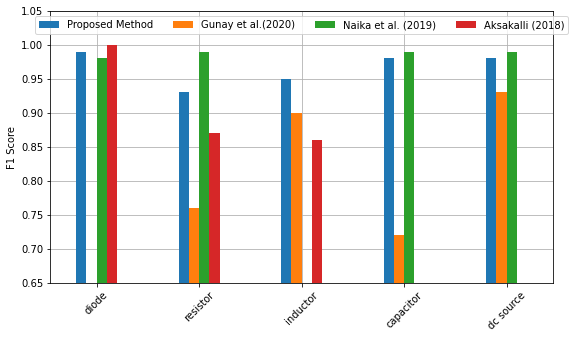

In [ ]:
import pandas as pd

df = pd.DataFrame({
                   'Proposed Method': proposed,
                   'Gunay et al.(2020)': gunay,
                   'Naika et al. (2019)': naika,
                   'Aksakalli (2018)': aksakalli
                   },index=class_names)

ax = df.plot.bar(rot=45,width=0.4,figsize=(9,5))
ax.set_axisbelow(True)
plt.grid(True)
plt.ylim(0.65)
plt.yscale("linear")
plt.ylabel("F1 Score")
plt.legend(loc="upper center", ncol=(len(df.columns)),)
